Import and setup

In [5]:
# Part 1: Imports and Setup
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Data Loading and Initial Exploration

In [6]:
# Part 2: Data Loading and Initial Exploration
df = pd.read_csv('Retail(Dataset).csv')  # Loading dataset
df_head = df.head()  # Display top 5 rows
df_tail = df.tail()  # Display bottom 5 rows
df_shape = df.shape
df_description = df.describe()  # Display summary
df_null_values = df.isnull().sum()  # Checking null values
df_info = df.info()  # Information about the dataset
df_columns = df.columns
df_duplicates_before = df.duplicated().sum()
df_nunique = df.nunique()
df['Postal Code'] = df['Postal Code'].astype('object')
df.drop_duplicates(subset=None, keep='first', inplace=True)
df_duplicates_after = df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Correlation Analysis and Visualization

<Axes: >

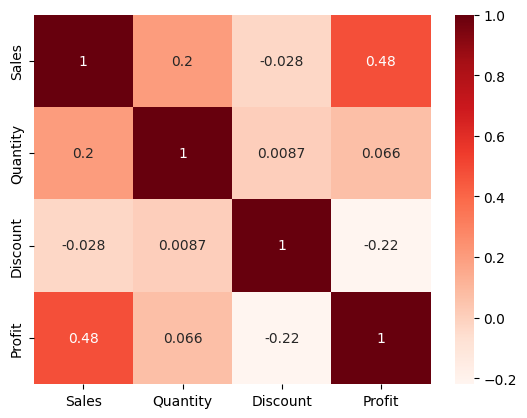

In [7]:
# # Part 3: Correlation Analysis and Visualization
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='Reds')
# Part 3: Correlation Analysis and Visualization
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='Reds')


Pair Plots and Distribution Analysis

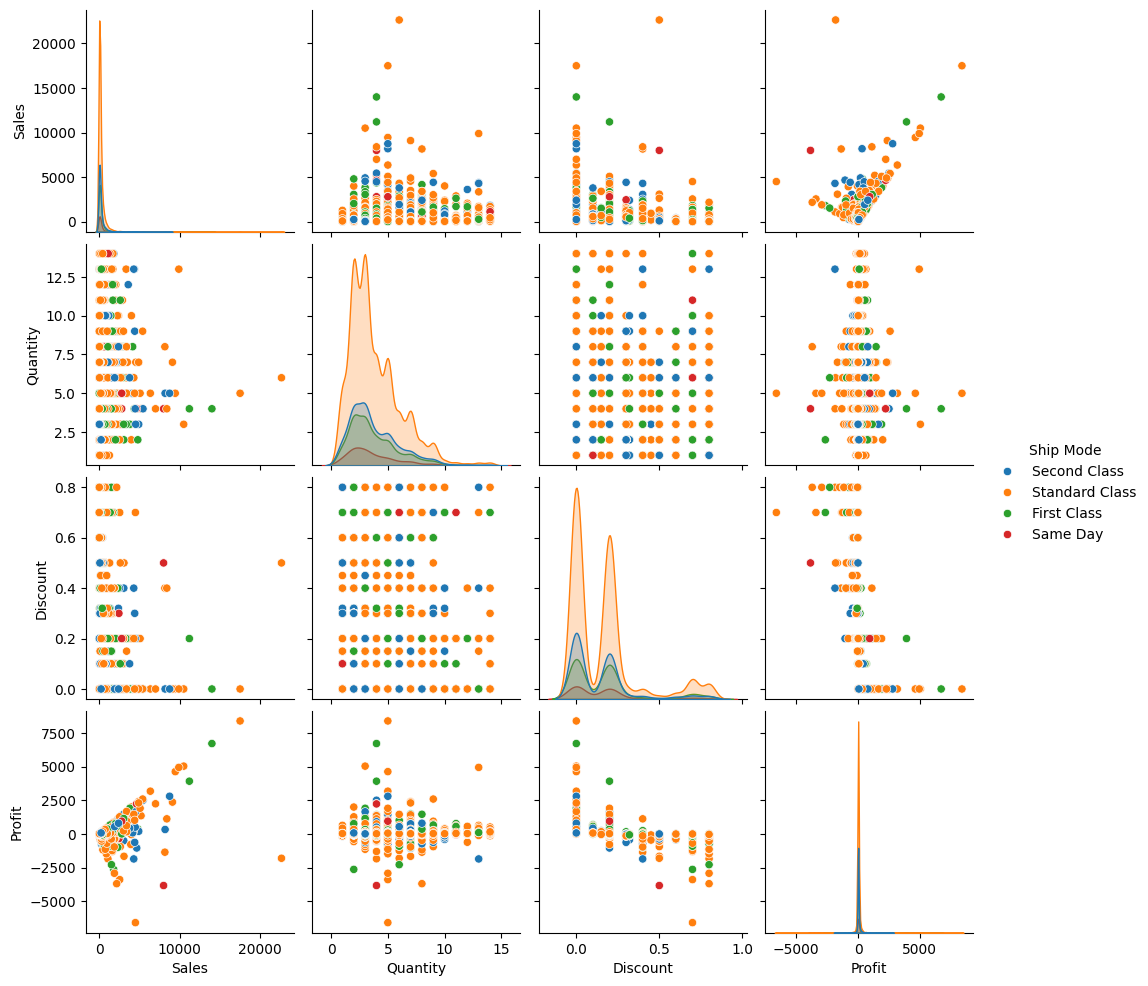

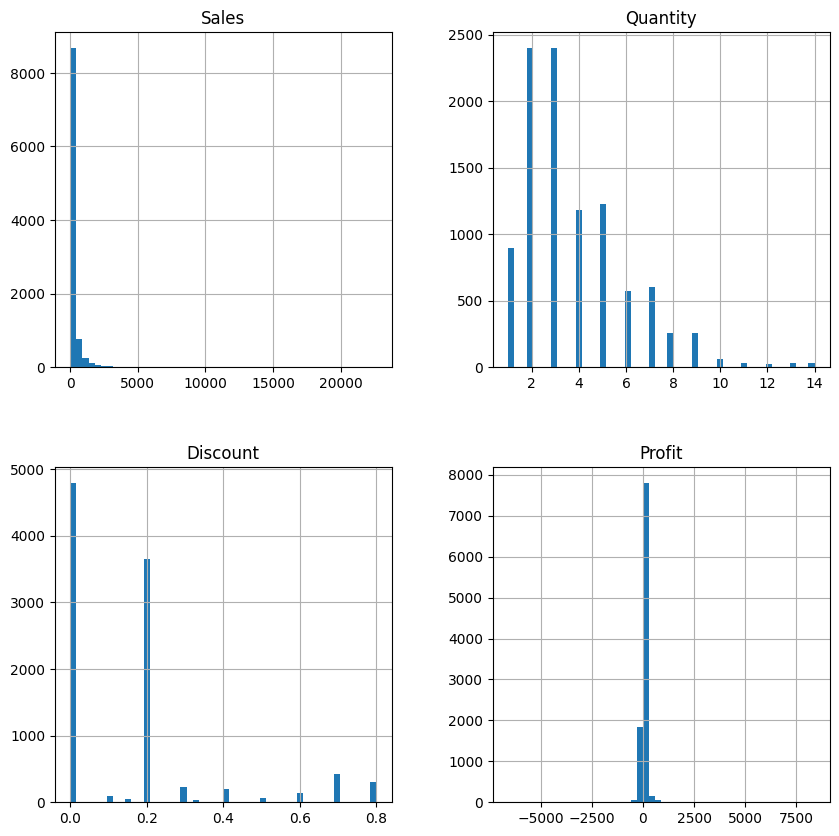

In [8]:
# Part 4: Pair Plots and Distribution Analysis
df = df.drop(['Postal Code'], axis=1)  # Dropping postal code columns
sns.pairplot(df, hue='Ship Mode')
df.hist(figsize=(10, 10), bins=50)
plt.show()

Categorical Analysis

<Axes: xlabel='Profit', ylabel='Density'>

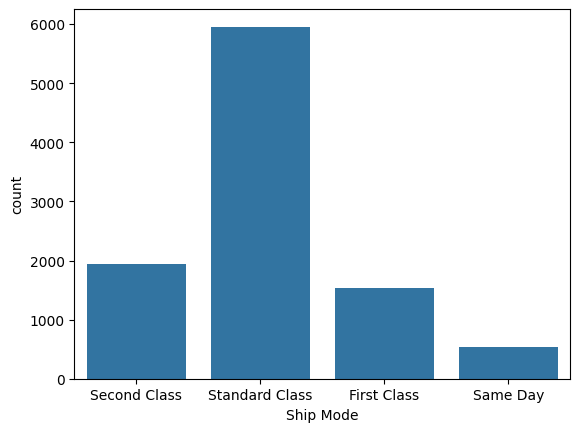

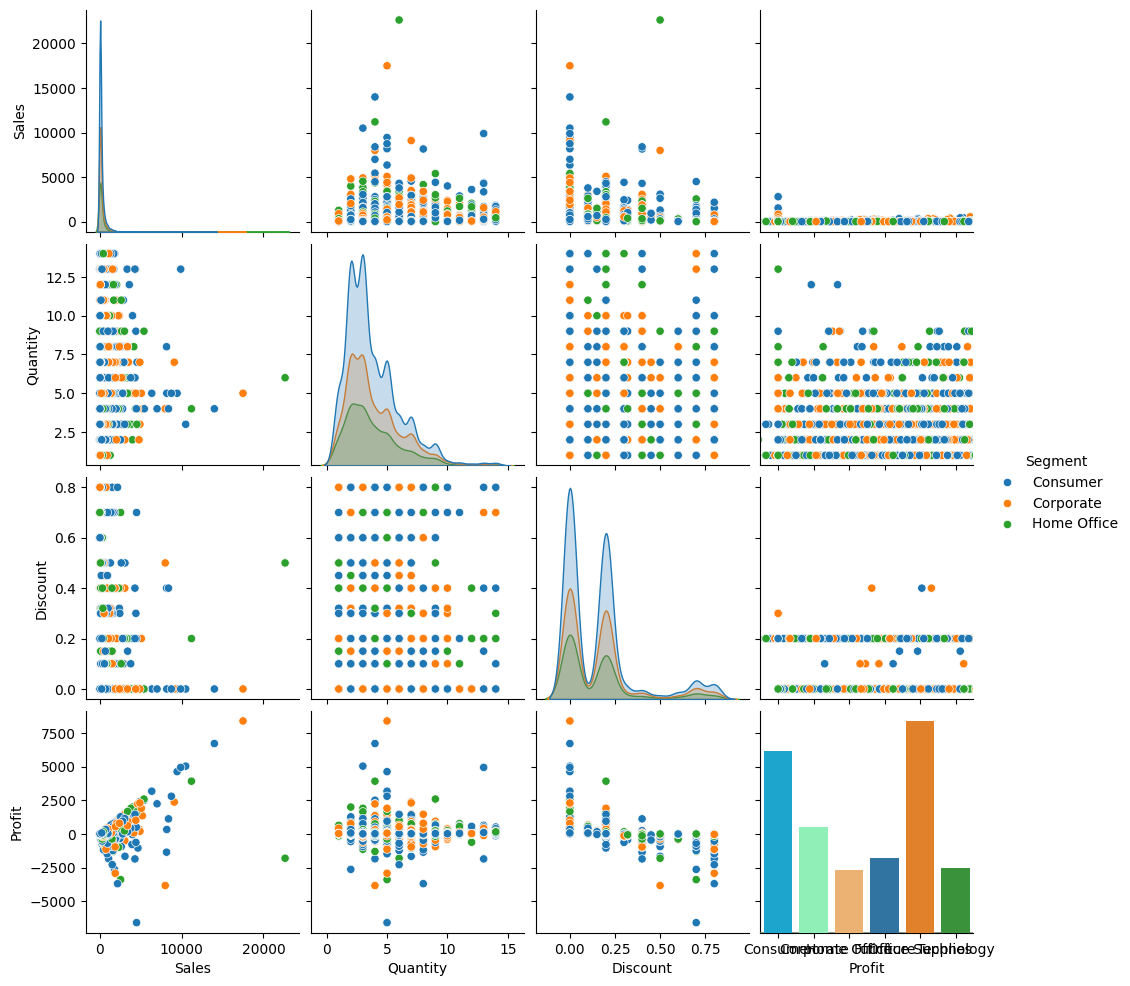

In [9]:
# Part 5: Categorical Analysis
sns.countplot(x=df['Ship Mode'])
segment_value_counts = df['Segment'].value_counts()  # Value counts for segment
sns.pairplot(df, hue='Segment')  # Plotting pair plot
sns.countplot(x='Segment', data=df, palette='rainbow')
category_value_counts = df['Category'].value_counts()
sns.countplot(x='Category', data=df, palette='tab10')

Sub-Category Analysis

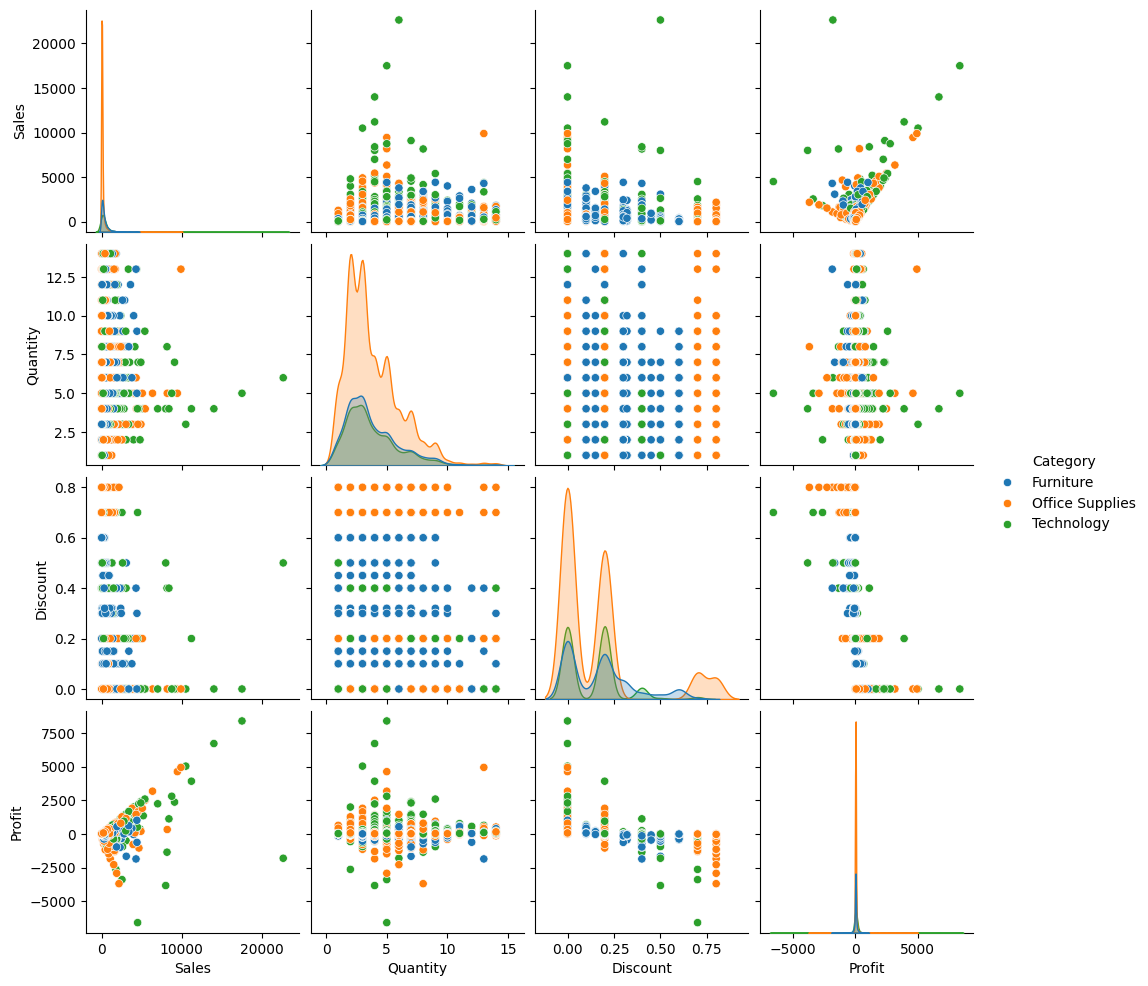

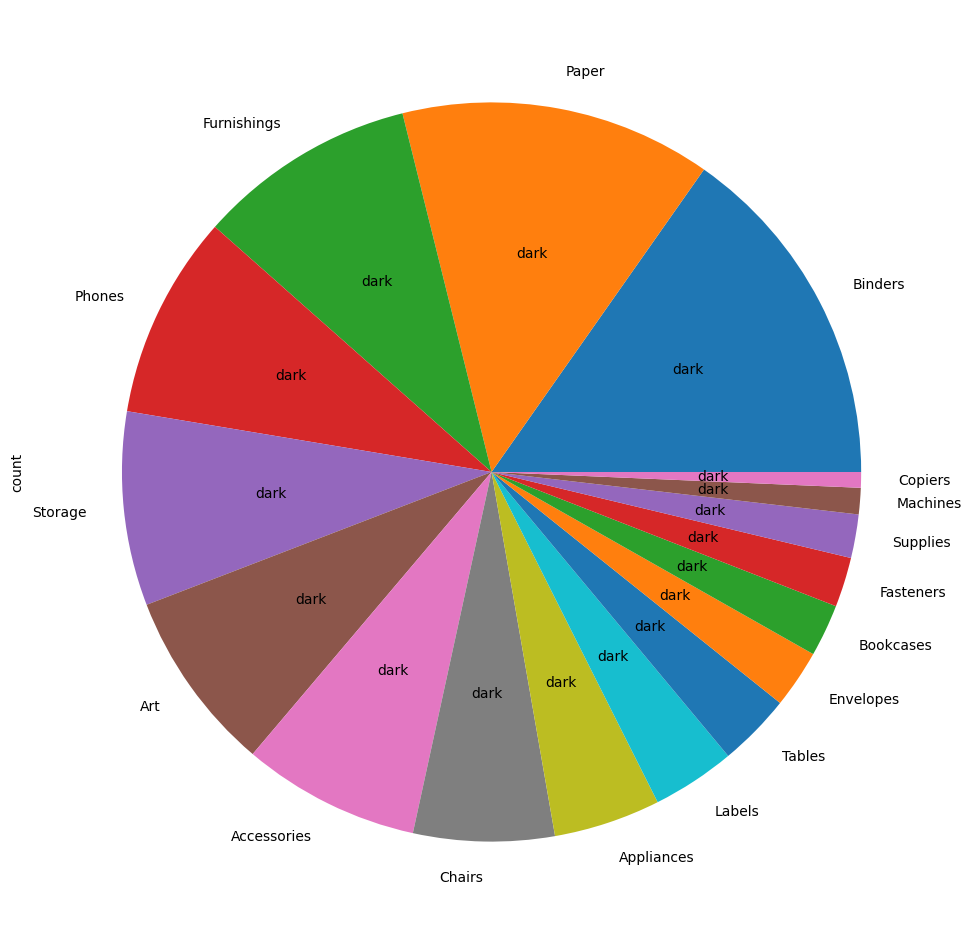

In [10]:
# Part 6: Sub-Category Analysis
sns.pairplot(df, hue='Category')
sub_category_value_counts = df['Sub-Category'].value_counts()
plt.figure(figsize=(15, 12))
sub_category_value_counts.plot.pie(autopct='dark')
plt.show()

Observations and Visualizations

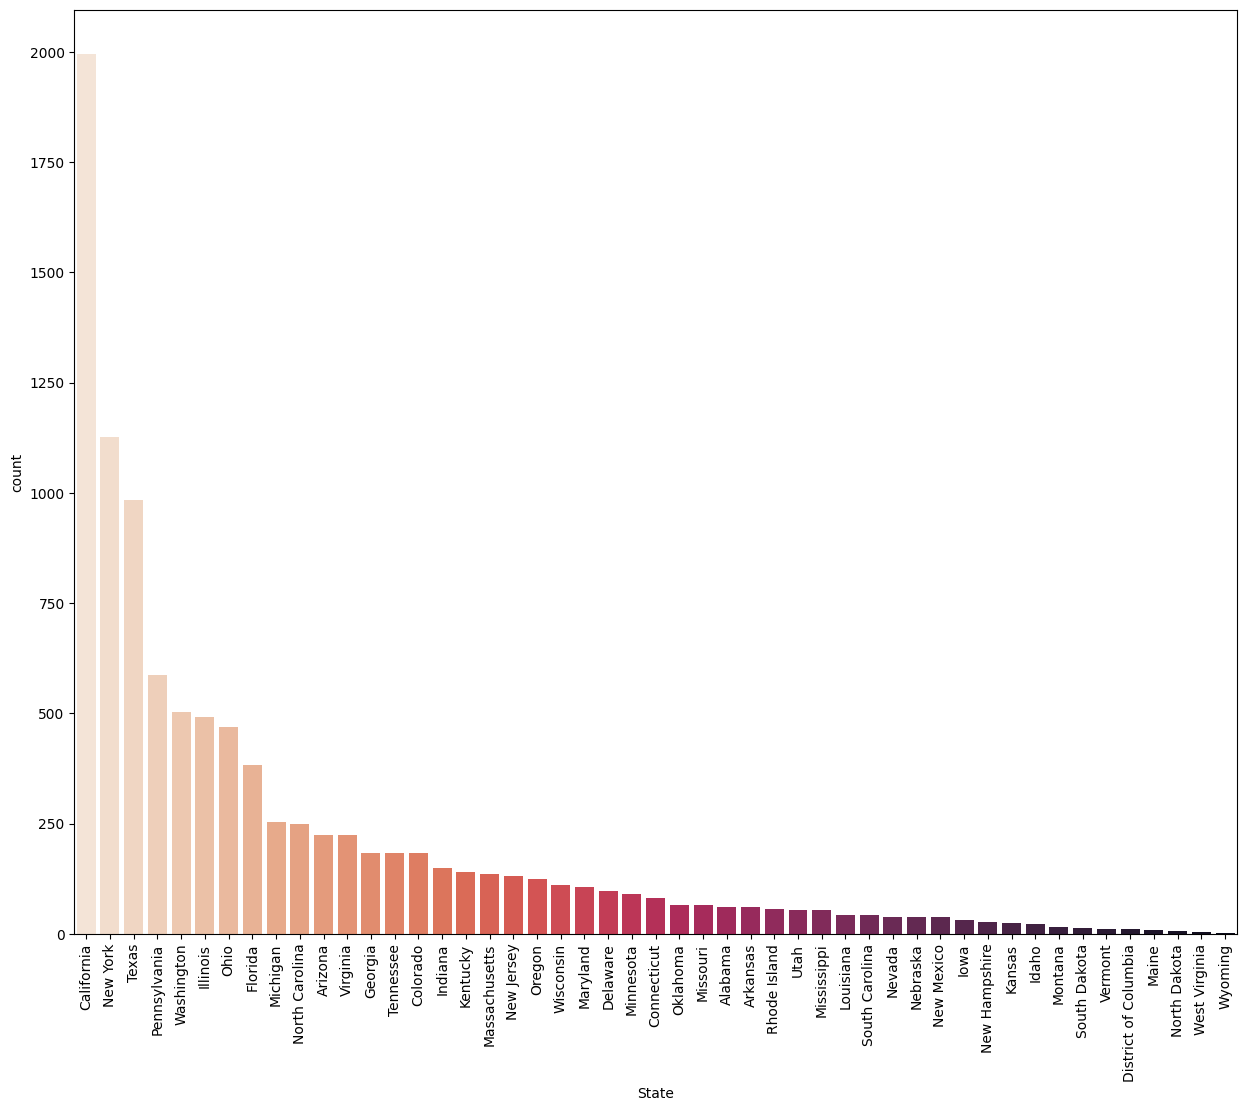

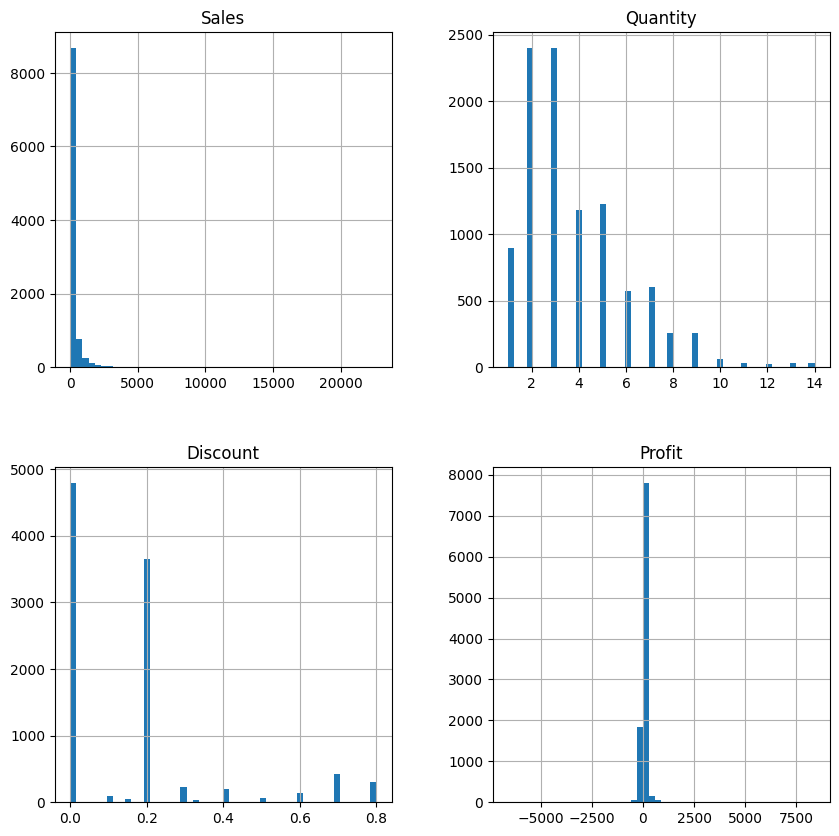

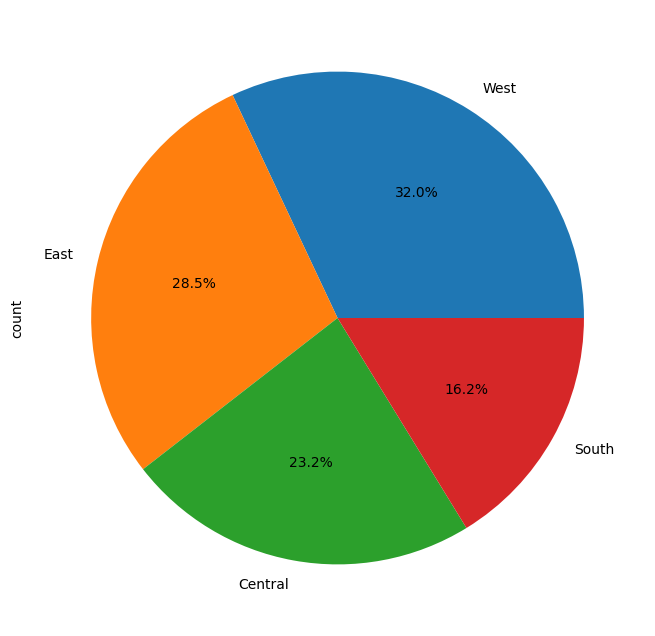

In [11]:
# Part 7: Observations and Visualizations
# Observation 1
# Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers
state_value_counts = df['State'].value_counts()
plt.figure(figsize=(15, 12))
sns.countplot(x='State', data=df, palette='rocket_r', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
# Observation 2
# Highest number of buyers are from California and New York
df.hist(figsize=(10, 10), bins=50)
plt.show()
plt.figure(figsize=(10, 8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Profit and Sales Analysis

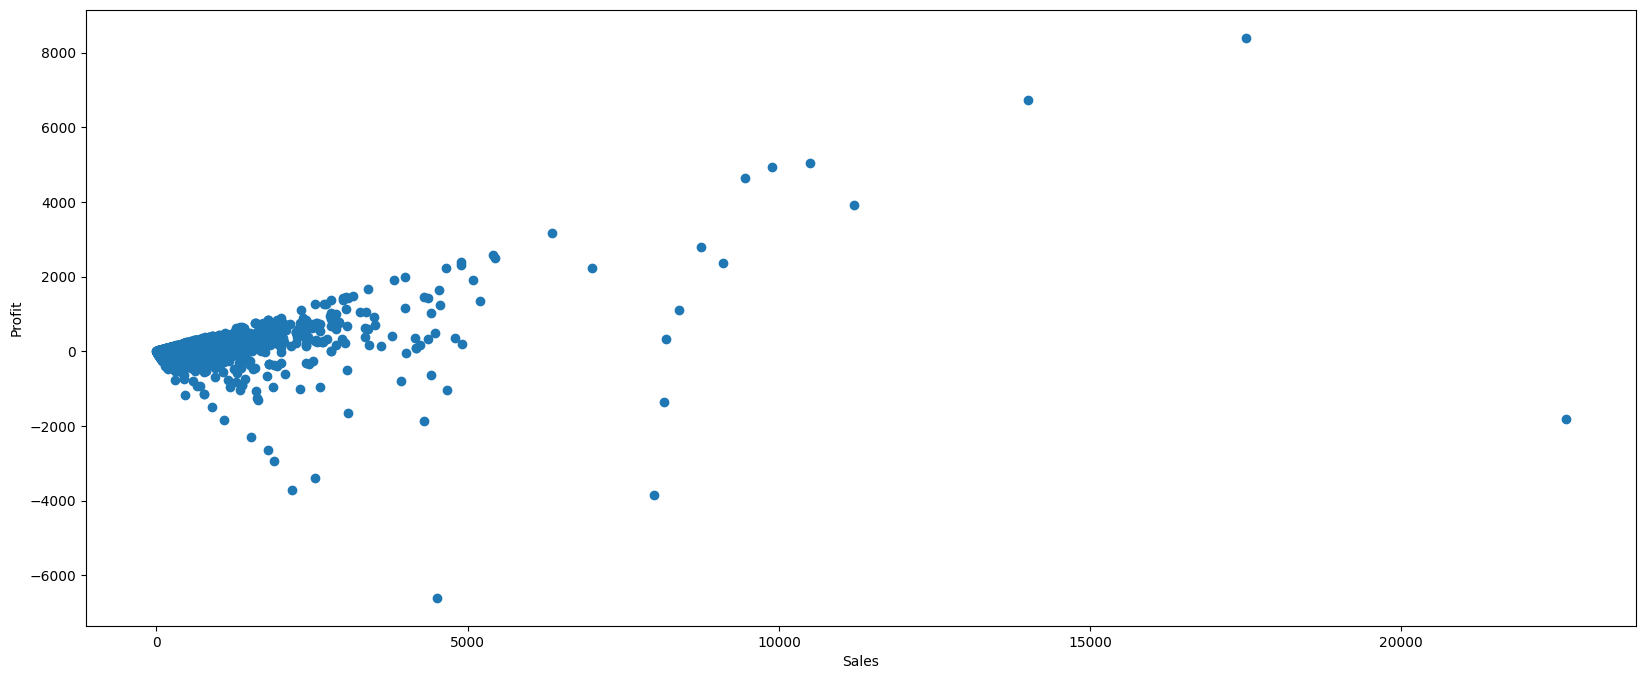

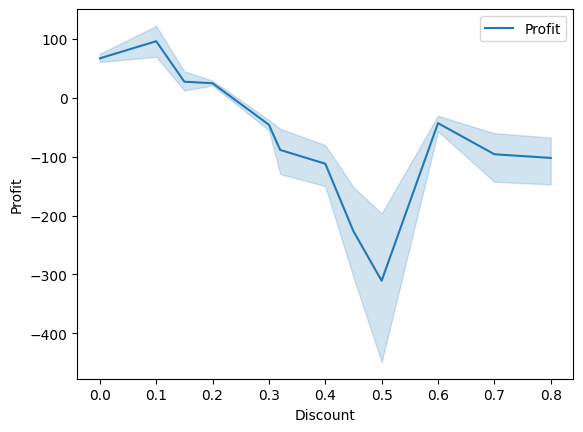

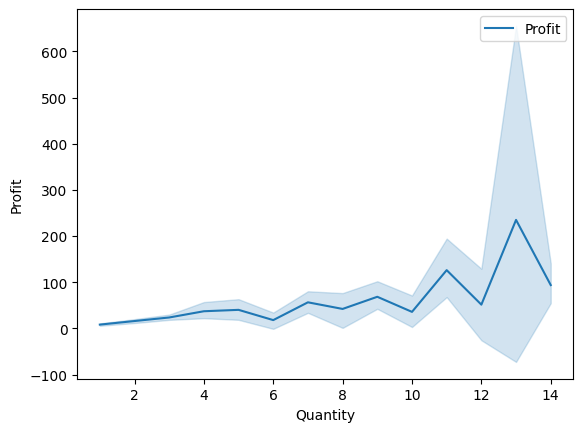

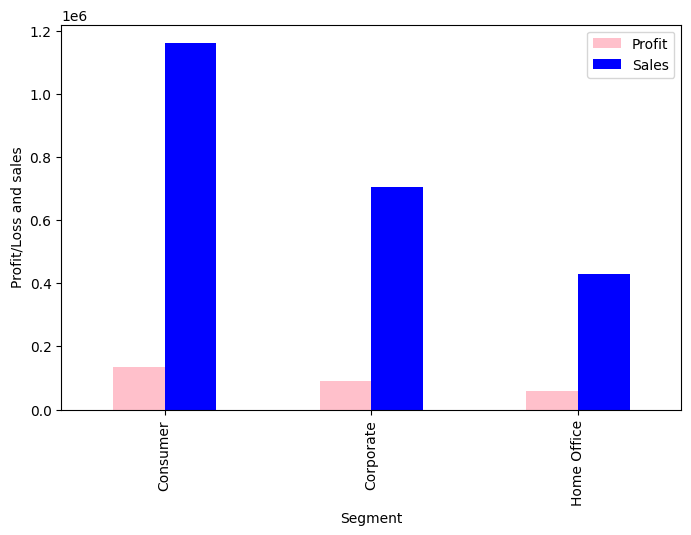

In [12]:
# Part 8: Profit and Sales Analysis
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df['Sales'], df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()
sns.lineplot(x='Discount', y='Profit', label='Profit', data=df)
plt.legend()
plt.show()
sns.lineplot(x='Quantity', y='Profit', label='Profit', data=df)
plt.legend()
plt.show()
df_segment_profit_sales = df.groupby('Segment')[['Profit', 'Sales']].sum()
df_segment_profit_sales.plot.bar(color=['pink', 'blue'], figsize=(8, 5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Regional Analysis

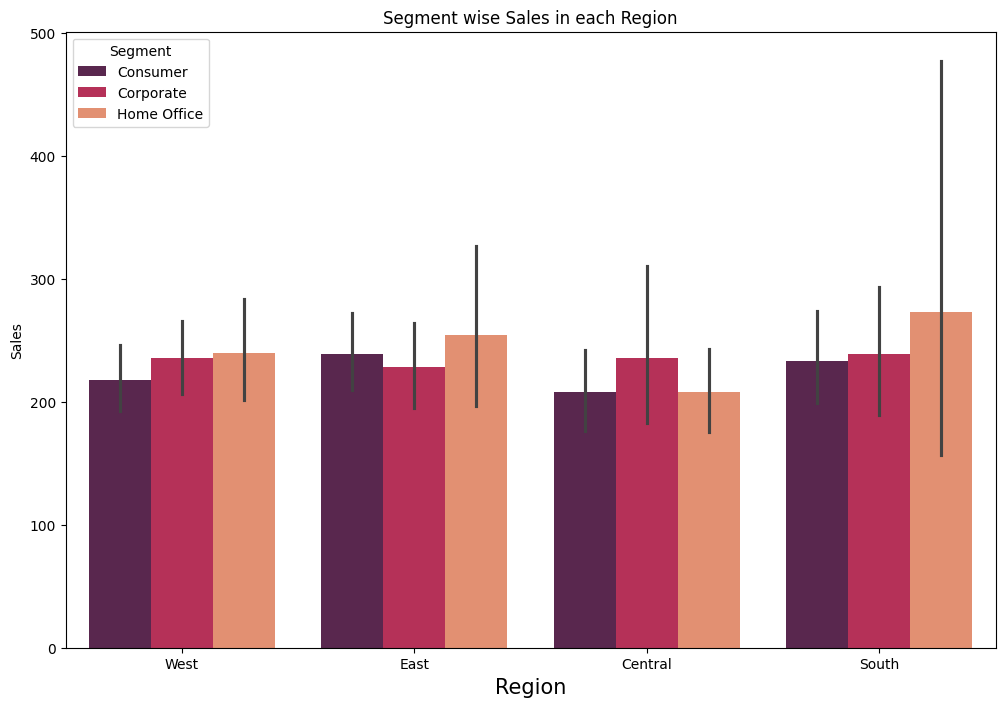

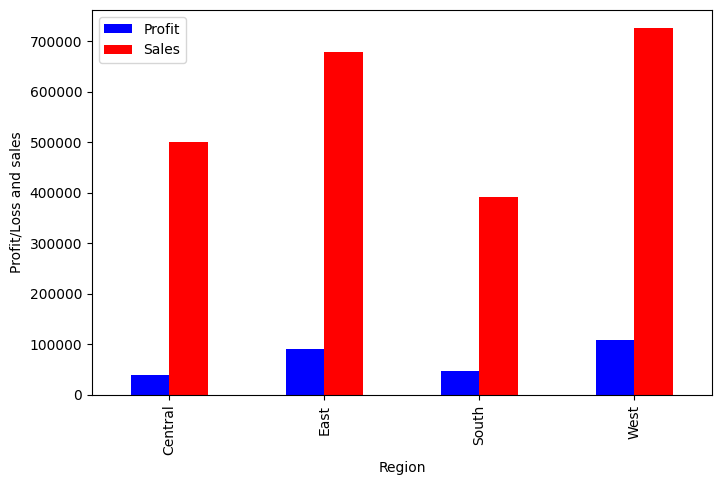

In [13]:
# Part 9: Regional Analysis
plt.figure(figsize=(12, 8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region', y='Sales', data=df, hue='Segment', order=df['Region'].value_counts().index, palette='rocket')
plt.xlabel('Region', fontsize=15)
plt.show()
df_region_profit_sales = df.groupby('Region')[['Profit', 'Sales']].sum()
df_region_profit_sales.plot.bar(color=['blue', 'red'], figsize=(8, 5))
plt.ylabel('Profit/Loss and sales')
plt.show()

State-wise Analysis

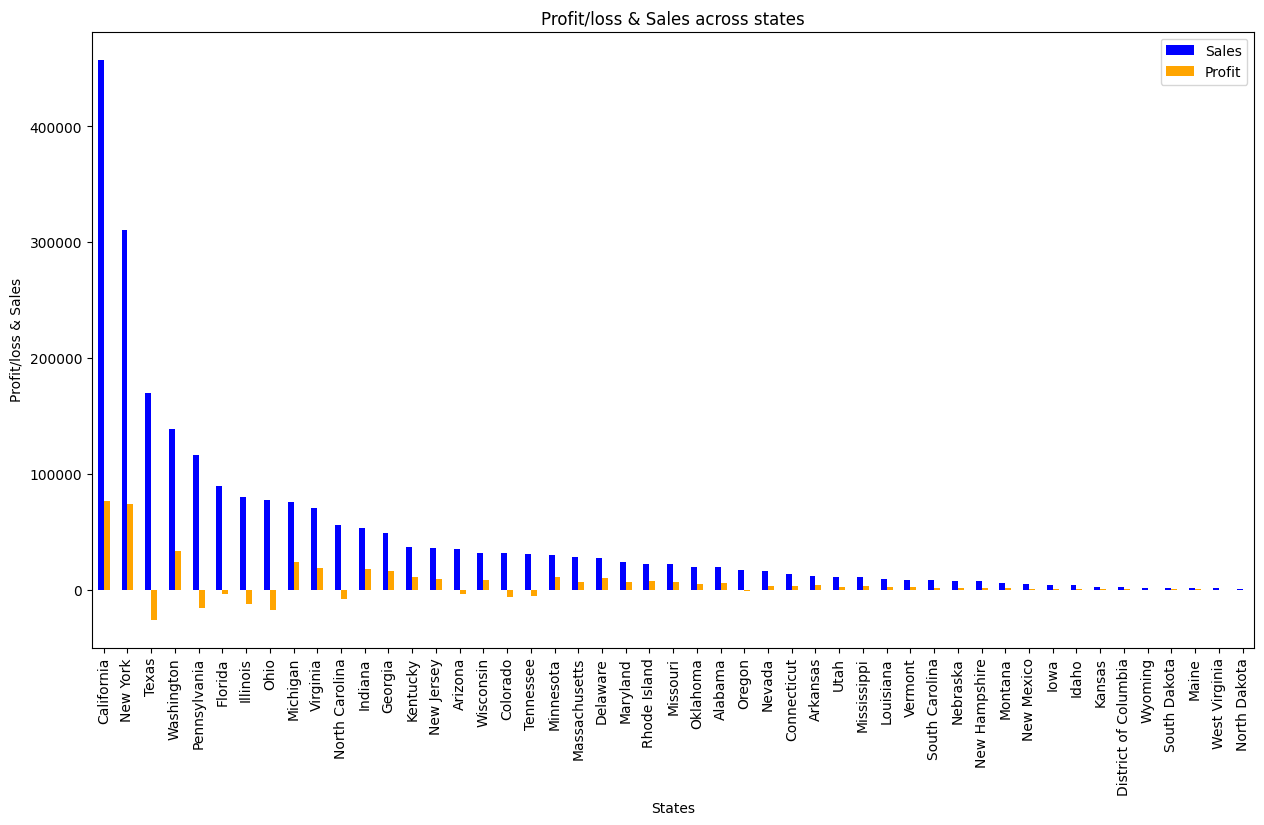

In [14]:
# Part 10: State-wise Analysis
df_state_profit_sales = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
df_state_profit_sales[:].plot.bar(color=['blue', 'orange'], figsize=(15, 8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()
top_states = df['State'].value_counts().nlargest(10)

Category and Sub-Category Wise Analysis

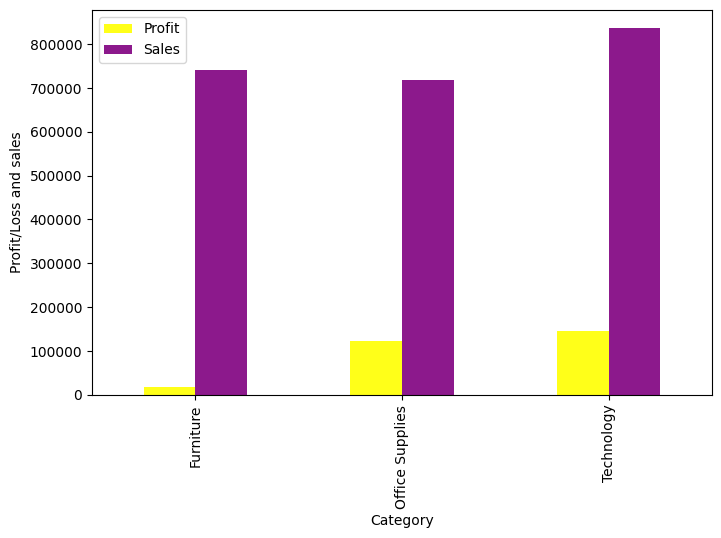

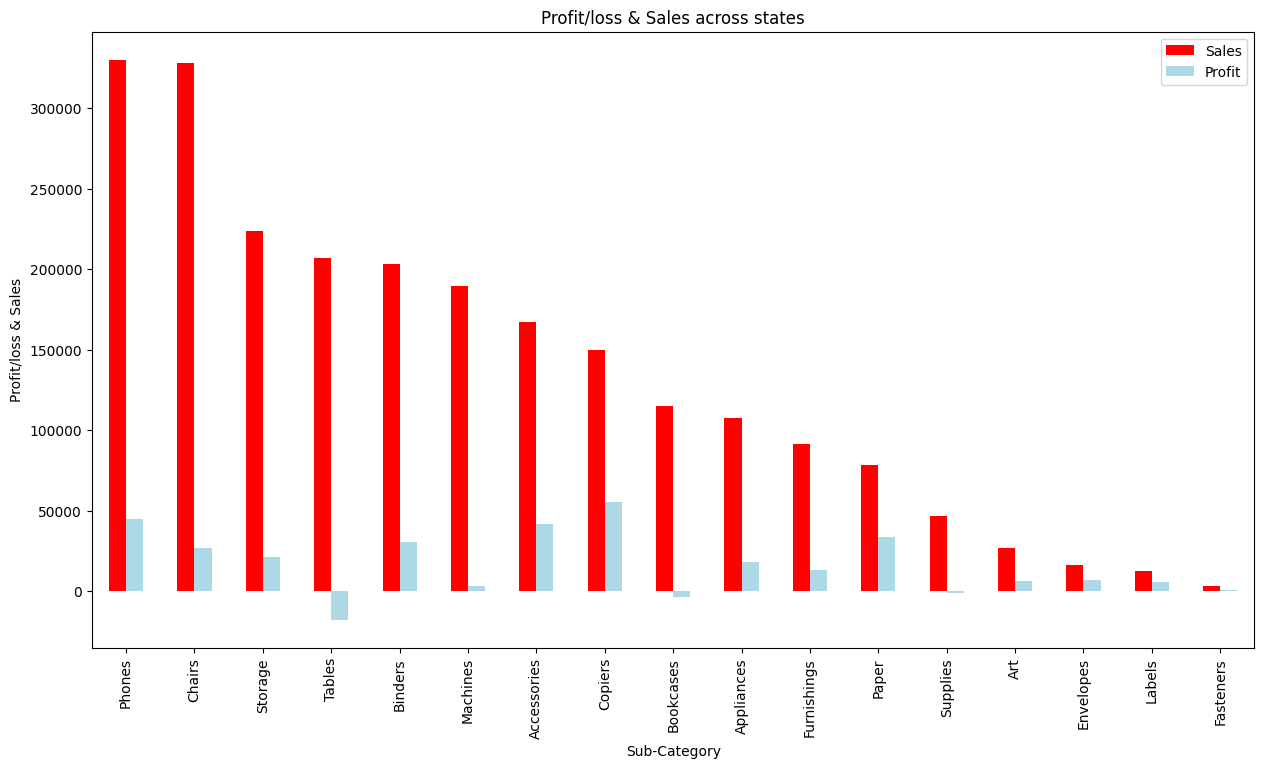

In [15]:
# Part 11: Category and Sub-Category Wise Analysis
df_category_profit_sales = df.groupby('Category')[['Profit', 'Sales']].sum()
df_category_profit_sales.plot.bar(color=['yellow', 'purple'], alpha=0.9, figsize=(8, 5))
plt.ylabel('Profit/Loss and sales')
plt.show()
df_sub_category_profit_sales = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
df_sub_category_profit_sales[:].plot.bar(color=['red', 'lightblue'], figsize=(15, 8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Exploratory Data Analysis (EDA) Observations

## Observation 1
- Maximum occurrences are from Binders, Paper, Furnishings, Phones, Storage, Art, Accessories, and minimum from Copiers, Machines, Suppliers.

## Observation 2
- The highest number of buyers are from California and New York.

## Observation 3
- Most customers tend to buy quantities of 2 and 3.
- Discounts given are mostly in the range of 0 to 20 percent.

## Observation 4
- No significant correlation between profit and discount.

### Profit vs Quantity
## Observation 5
- Profit and sales are maximum in the Consumer segment and minimum in the Home Office segment.

## Observation 6
- Segment-wise sales are consistent across every region.

## Observation 7
- Profit and sales are maximum in the West region and minimum in the South region.

## Observation 8
- High profit is observed for California and New York.
- Losses are experienced in Texas, Pennsylvania, Ohio.

## Observation 9
- As a business manager, try to find out the weak areas where you can work to make more profit:
  - Technology and Office Supplies have high profits.
  - Furniture has less profit.

## Observation 10
- Phones sub-category has high sales.
- Chairs have high sales but less profit compared to phones.
- Tables and Bookmarks sub-categories are facing significant losses.
